In [3]:
import os
import pandas

data = pandas.read_csv('./dataset2/device_info.csv')

print ("Number of rows:", data.shape[0])
print ("Number of columns: ", data.shape[1]) #it adds one index column automatically

Number of rows: 405380
Number of columns:  5


In [4]:
import datetime as dt
data['date'] = data.date.apply(lambda x:dt.datetime.strptime(x,"%m/%d/%Y %H:%M:%S"))
data['Logon_hour'] = data.date.apply(lambda x:x.hour)

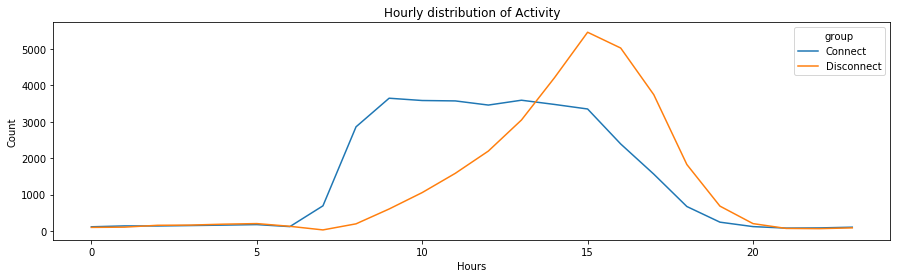

In [72]:
import matplotlib.pyplot as plot
#logon_data=data.groupby('Logon_hour').mean().reset_index()
logon_data=data.groupby(['Logon_hour','activity'])['id'].count().reset_index()
logon_data.columns = ['Logon_hour','Activity','Count']
logon_data_connect = logon_data[logon_data['Activity']=='Connect']
logon_data_disconnect = logon_data[logon_data['Activity']=='Disconnect']
fig,ax = plot.subplots(1,1,figsize = (15,4))
plot.plot(logon_data_connect.Logon_hour,logon_data_connect.Count)
plot.plot(logon_data_disconnect.Logon_hour,logon_data_disconnect.Count)
plot.xlabel('Hours')
plot.ylabel('Count')
plot.title('Hourly distribution of Activity')
plot.legend(['Connect','Disconnect'],loc='best',title='group')
plot.show()


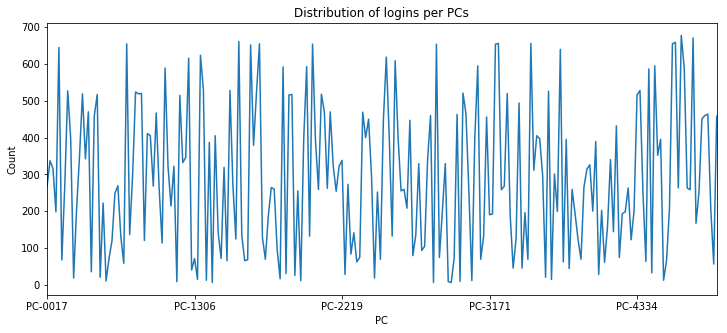

In [33]:
pc_data=data.groupby(['pc'])['id'].count()
pc_data.columns = ['PC','Count']
fig,ax = plot.subplots(1,1,figsize=(12,5))
pc_data.plot(ax=ax)
plot.ylabel('Count')
plot.xlabel('PC')
plot.title('Distribution of logins per PCs')
plot.show()

### Website

In [35]:
data_web = pandas.read_csv('http_info.csv')

print ("Number of rows:", data_web.shape[0])
print ("Number of columns: ", data_web.shape[1])

Number of rows: 3451664
Number of columns:  5


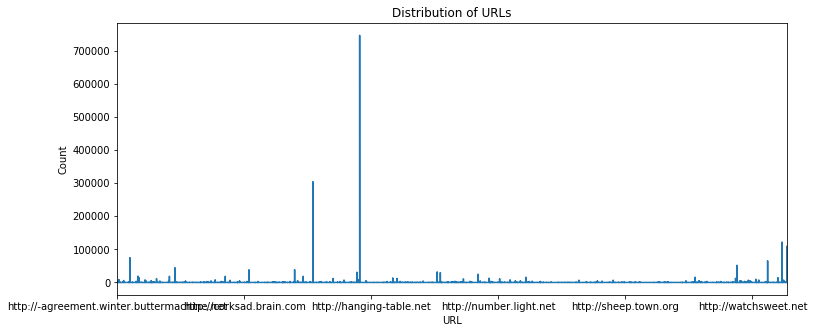

In [42]:
data_web.columns = ['id', 'date', 'user', 'pc', 'url']
url_data=data_web.groupby(['url'])['id'].count()
url_data.columns = ['url','Count']
fig,ax = plot.subplots(1,1,figsize=(12,5))
url_data.plot(ax=ax)
plot.ylabel('Count')
plot.xlabel('URL')
plot.title('Distribution of URLs')
plot.show()

In [45]:
url_data.sort_values(ascending=False).head(10)

url
http://google.com        745771
http://facebook.com      304103
http://yahoo.com         121966
http://youtube.com       109341
http://amazon.com         74749
http://wikipedia.org      65351
http://twitter.com        51816
http://blogspot.com       44477
http://ebay.com           38656
http://craigslist.org     38268
Name: id, dtype: int64

In [75]:
data_web['date'] = data_web.date.apply(lambda x:dt.datetime.strptime(x,"%m/%d/%Y %H:%M:%S"))
data_web['hour'] = data_web.date.apply(lambda x:x.hour)

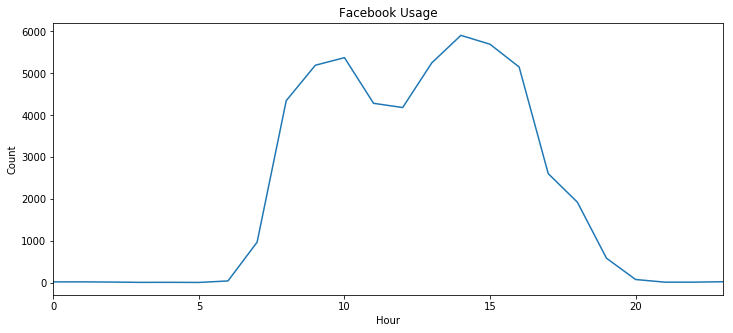

In [93]:
facebook_data=data_web[data_web.url=='http://twitter.com']
facebook_data=facebook_data.groupby(['hour'])['id'].count()
facebook_data.columns = ['hour','Count']
fig,ax = plot.subplots(1,1,figsize=(12,5))
facebook_data.plot(ax=ax)
plot.ylabel('Count')
plot.xlabel('Hour')
plot.title('Facebook Usage')
plot.show()

#### Avg login time

In [ ]:
logon_data=data.groupby(['Logon_hour','activity'])['id'].count().reset_index()
logon_data.columns = ['Logon_hour','Activity','Count']
logon_data_connect = logon_data[logon_data['Activity']=='Connect']
logon_data_disconnect = logon_data[logon_data['Activity']=='Disconnect']
fig,ax = plot.subplots(1,1,figsize = (15,4))
plot.plot(logon_data_connect.Logon_hour,logon_data_connect.Count)
plot.plot(logon_data_disconnect.Logon_hour,logon_data_disconnect.Count)
plot.xlabel('Hours')ct
plot.ylabel('Count')
plot.title('Hourly distribution of Activity')
plot.legend(['Connect','Disconnect'],loc='best',title='group')
plot.show()

In [4]:
data_email = pandas.read_csv('email_info.csv')
data_email.head(5)

,id,date,user,pc,to,cc,bcc,from,size,attachments,content
0,{R3I7-S4TX96FG-8219JWFF},01/02/2010 07:11:45,LAP0338,PC-5758,Dean.Flynn.Hines@dtaa.com;Wade_Harrison@lockhe...,Nathaniel.Hunter.Heath@dtaa.com,NaN,Lynn.Adena.Pratt@dtaa.com,25830,0,middle f2 systems 4 july techniques powerful d...
1,{R0R9-E4GL59IK-2907OSWJ},01/02/2010 07:12:16,MOH0273,PC-6699,Odonnell-Gage@bellsouth.net,NaN,NaN,MOH68@optonline.net,29942,0,the breaking called allied reservations former...
2,{G2B2-A8XY58CP-2847ZJZL},01/02/2010 07:13:00,LAP0338,PC-5758,Penelope_Colon@netzero.com,NaN,NaN,Lynn_A_Pratt@earthlink.net,28780,0,slowly this uncinus winter beneath addition ex...
3,{A3A9-F4TH89AA-8318GFGK},01/02/2010 07:13:17,LAP0338,PC-5758,Judith_Hayden@comcast.net,NaN,NaN,Lynn_A_Pratt@earthlink.net,21907,0,400 other difficult land cirrocumulus powered ...
4,{E8B7-C8FZ88UF-2946RUQQ},01/02/2010 07:13:28,MOH0273,PC-6699,Bond-Raymond@verizon.net;Alea_Ferrell@msn.com;...,NaN,Odonnell-Gage@bellsouth.net,MOH68@optonline.net,17319,0,this kmh october holliswood number advised unu...


In [13]:
from gensim import corpora, models, similarities
from itertools import chain


documents = ["Human machine interface for lab abc computer applications",
             "A survey of user opinion of computer system response time",
             "The EPS user interface management system",
             "System and human system engineering testing of EPS",
             "Relation of user perceived response time to error measurement",
             "The generation of random binary unordered trees",
             "The intersection graph of paths in trees",
             "Graph minors IV Widths of trees and well quasi ordering",
             "Graph minors A survey"]

# remove common words and tokenize
stoplist = set('for a of the and to in'.split())
texts = [[word for word in document.lower().split() if word not in stoplist]
         for document in documents]

# remove words that appear only once
all_tokens = sum(texts, [])
tokens_once = set(word for word in set(all_tokens) if all_tokens.count(word) == 1)
texts = [[word for word in text if word not in tokens_once] for text in texts]

# Create Dictionary.
id2word = corpora.Dictionary(texts)
# Creates the Bag of Word corpus.
mm = [id2word.doc2bow(text) for text in texts]

# Trains the LDA models.
lda = models.ldamodel.LdaModel(corpus=mm, id2word=id2word, num_topics=3, \
                               update_every=1, chunksize=10000, passes=1)

# Prints the topics.
for top in lda.print_topics():
  print(top)
print

# Assigns the topics to the documents in corpus
lda_corpus = lda[mm]

# Find the threshold, let's set the threshold to be 1/#clusters,
# To prove that the threshold is sane, we average the sum of all probabilities:
scores = list(chain(*[[score for topic_id,score in topic] \
                      for topic in [doc for doc in lda_corpus]]))
threshold = sum(scores)/len(scores)
print(threshold)
print

cluster1 = [j for i,j in zip(lda_corpus,documents) if i[0][1] > threshold]
cluster2 = [j for i,j in zip(lda_corpus,documents) if i[1][1] > threshold]
cluster3 = [j for i,j in zip(lda_corpus,documents) if i[2][1] > threshold]

print(cluster1)
print(cluster2)
print(cluster3)

(0, '0.302*"trees" + 0.226*"graph" + 0.130*"minors" + 0.041*"computer" + 0.040*"system" + 0.038*"user" + 0.038*"eps" + 0.038*"human" + 0.037*"survey" + 0.037*"time"')
(1, '0.184*"system" + 0.128*"interface" + 0.127*"human" + 0.127*"eps" + 0.076*"graph" + 0.075*"minors" + 0.075*"user" + 0.072*"survey" + 0.071*"computer" + 0.024*"trees"')
(2, '0.172*"user" + 0.171*"response" + 0.169*"time" + 0.101*"system" + 0.101*"survey" + 0.100*"computer" + 0.043*"trees" + 0.030*"graph" + 0.028*"eps" + 0.028*"minors"')
0.333333333333
['The generation of random binary unordered trees', 'The intersection graph of paths in trees', 'Graph minors IV Widths of trees and well quasi ordering', 'Graph minors A survey']
['Human machine interface for lab abc computer applications', 'The EPS user interface management system', 'System and human system engineering testing of EPS', 'Graph minors A survey']
['A survey of user opinion of computer system response time', 'Relation of user perceived response time to erro

# LDA

In [15]:
import pandas
import os
import numpy as np

from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models, similarities
from gensim.models import CoherenceModel, Phrases
from nltk.corpus import stopwords
from spacy.lang.en.stop_words import STOP_WORDS


import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim') # to suppress warnings on windows.
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim.models')


_dataset2_dir = "C:\\Users\\talha\\Documents\\DA\\da_project\\dataset2\\"
email_file = _dataset2_dir + "email_info.csv"
data_email = pandas.read_pickle(_dataset2_dir+"email_sen_df")
doc_set = data_email["content"][:50000].tolist()

In [10]:
_dataset2_dir = "C:\\Users\\talha\\Documents\\DA\\da_project\\dataset2\\"
email_file = _dataset2_dir + "email_info.csv"
data_email = pandas.read_pickle(_dataset2_dir+"email_sen_df")
doc_set = data_email["content"][:1000].tolist()

In [11]:
# en_stop

In [16]:
num_topics = 10

tokenizer = RegexpTokenizer(r'\w+')
en_stop = get_stop_words('en')
p_stemmer = PorterStemmer()

texts = []

# loop through document list
for i in doc_set:    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)
    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if i not in en_stop and not i.isdigit()]
    # add tokens to list
    texts.append(stopped_tokens)
    
bigram = Phrases(texts)
texts = [bigram[line] for line in texts]

all_tokens = sum(texts, [])
tokens_once = set(word for word in set(all_tokens) if all_tokens.count(word) == 1)
texts = [[word for word in text if word not in tokens_once] for text in texts]
    
# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
# convert tokenized documents into a document-term matrix
# every word is mapped to an id and creating a bag-of-words from that.
corpus = [dictionary.doc2bow(text) for text in texts]

ldamodel = models.ldamodel.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=2,  chunksize=10000) # , passes=2,  chunksize=10000

C:\Users\talha\Anaconda3\lib\site-packages\gensim\models\phrases.py:275: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if all(parameter in getargspec(scoring)[0] for parameter in scoring_parameters):
C:\Users\talha\Anaconda3\lib\site-packages\gensim\models\phrases.py:275: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if all(parameter in getargspec(scoring)[0] for parameter in scoring_parameters):
C:\Users\talha\Anaconda3\lib\site-packages\gensim\models\phrases.py:275: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if all(parameter in getargspec(scoring)[0] for parameter in scoring_parameters):
C:\Users\talha\Anaconda3\lib\site-packages\gensim\models\phrases.py:275: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if all(parameter in getar

In [40]:
lda_corpus = [max(prob,key=lambda y:y[1])
                    for prob in ldamodel[corpus] ]
emails_LDA = [[] for i in range(num_topics)]
for i, x in enumerate(lda_corpus):
    emails_LDA[x[0]].append(doc_set[i])

In [123]:
count_bin=[None]*num_topics
for i in range(num_topics):
    count_bin[i]=len(emails_LDA[i])
count_bin

[1256, 329, 1615, 1030, 955, 1141, 818, 1130, 1218, 508]

In [125]:
ldatopics = ldamodel.show_topics(formatted=False)
ldatopics

[(0,
  [('prince_prince', 0.098568107384800513),
   ('ankh_prince', 0.011727563062891504),
   ('prince_ahmose', 0.011092840467881993),
   ('ahmose_prince', 0.010375323072961498),
   ('prince_ankh', 0.010238122189361551),
   ('prince', 0.0029203151346386888),
   ('much', 0.0024086213399227797),
   ('began', 0.0015000275915225715),
   ('little', 0.0012954403501289141),
   ('well', 0.001284125383061086)]),
 (1,
  [('well', 0.0018386878130500037),
   ('may', 0.0018031354470472636),
   ('later', 0.0016840185909777856),
   ('near', 0.0015821690515569978),
   ('june', 0.001547278208855565),
   ('late', 0.0014753765767801072),
   ('still', 0.0014380077165406183),
   ('however', 0.0014357664363025321),
   ('early', 0.0014296097988038942),
   ('also', 0.0013666796419265919)]),
 (2,
  [('many', 0.0019929764782893101),
   ('one', 0.0018194198084367009),
   ('another', 0.001740758519880271),
   ('north', 0.001695717826119162),
   ('two', 0.0015804657235377933),
   ('also', 0.0015729004310515956),
 

In [50]:
ldatopics = [[word for word, prob in topic] for topicid, topic in ldatopics]

LDA Coherence

In [124]:
lda_coherence = CoherenceModel(topics=ldatopics, texts=texts, dictionary=dictionary, window_size=10).get_coherence()
lda_coherence

0.26972014903851144

In [34]:
# fig,ax = plot.subplots(1,1,figsize=(12,5))
# pandas.Series(count_bin).plot(ax=ax)
# plot.ylabel('Count')
# plot.xlabel('URL')
# plot.title('Distribution of URLs')
# plot.show()

In [ ]:
# data_email["content"][2]

##### Visualization using pyLDAvis (uncomment to visualize)

In [17]:
import pyLDAvis.gensim
warnings.filterwarnings(action='ignore', category=UserWarning, module='pyLDAvis') # to suppress warnings on windows.

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

C:\Users\talha\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


# LDA for a range of topic numbers

In [15]:
import pandas
import os
import numpy as np

from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models, similarities
from gensim.models import CoherenceModel, Phrases
from nltk.corpus import stopwords
from spacy.lang.en.stop_words import STOP_WORDS


import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim') # to suppress warnings on windows.
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim.models')


_dataset2_dir = "C:\\Users\\talha\\Documents\\DA\\da_project\\dataset2\\"
email_file = _dataset2_dir + "email_info.csv"
data_email = pandas.read_pickle(_dataset2_dir+"email_sen_df")
doc_set = data_email["content"][:100000].tolist()

In [16]:
tokenizer = RegexpTokenizer(r'\w+')
en_stop = set(get_stop_words('en'))
spacy_stop = set(STOP_WORDS)
nltk_stop = set(stopwords.words('english'))
my_stop_words = set(['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'first', 'second', 'third',
                'many', 'however', 'since', 'either', 'although', 'much', 'also', 'another', 'became', 'become', 'usually', 
                    'also', 'c', 'along', 'made', 'still', 'known', 'took', 'less', 'around', 'though', 'part', 'gave',
                    'later', 'early', 'went', 'long', 'began', 'mid', 'set', 'late', 'wrote', 'given', 'day', 'away',
                    'able', 'way', 'met', 'come', 'etc', 'able', 'said', 'based', 'kept', 'left', 'came', 'led', 'old', 
                    'new', 'apart', 'named', 'agrees', 'received', 'left', 'found', 'begun', 'late', 'early',
                    'half', 'new', 'old', 'instead', 'despite', 'overall', 'b', 'including', 'f', 'eyes',
                     
                     'east', 'west', 'north', 'south', 'january', 'february', 'march', 'april', 'may', 'june', 'july', 
                     'august', 'september', 'october', 'november', 'december', 'according', 
                     
                     'near', 'initial', 'ultimately', 'better'])

stop_words = en_stop.union(my_stop_words).union(nltk_stop).union(spacy_stop)

print(len(stop_words))

450


In [17]:
en_stop = set(get_stop_words('en'))
'early' in get_stop_words('en')

False

In [18]:
def topic_analysis(data, num_topics, iterations=200):
    """
    @param data list of all the documents
    @param num_topics number of topics to find from topic modeling
    """
    texts = [None] * len(doc_set)
    # loop through document list
    for ind, i in enumerate(doc_set):
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if i not in stop_words and not i.isdigit()]
        # add tokens to list
        #texts.append(stopped_tokens)
        texts[ind]=stopped_tokens
    
    bigram = Phrases(texts)
    texts = [bigram[line] for line in texts]
        
    # remove words that appear only once
    all_tokens = sum(texts, [])
    tokens_once = set(word for word in set(all_tokens) if all_tokens.count(word) == 1)
    texts = [[word for word in text if word not in tokens_once] for text in texts]

    # turn our tokenized documents into a id <-> term dictionary
    dictionary = corpora.Dictionary(texts)
    # convert tokenized documents into a document-term matrix
    corpus = [dictionary.doc2bow(text) for text in texts]
    ldamodel = models.ldamodel.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, 
                                        iterations=iterations, minimum_probability=0, passes=20) # , passes=20,  chunksize=10000
    return (ldamodel, dictionary, corpus, texts)

In [32]:
start_time = time.time()
print ("Start At: " + time.strftime("%H:%M:%S", time.gmtime(start_time)))

topic_range = np.arange(10, 11)
coherences = np.zeros(topic_range.shape)
ldamodels = np.empty(topic_range.shape, dtype=object)
iterations=100

_ldamodel=None
corpus=None
dictionary=None
texts=None
min_lda_coherence = 0

for i, _num_topic in enumerate(topic_range):
    (ldamodel, dictionary, corpus, texts) = topic_analysis(doc_set, _num_topic, iterations=iterations)
    print ("LDA Model complete... " + time.strftime("%H:%M:%S", time.gmtime(time.time() - start_time)))
    ldatopics = ldamodel.show_topics(formatted=False)
    ldatopics = [[word for word, prob in topic] for topicid, topic in ldatopics]
    print ("Got ldatopics. Creating coherence model.. "  + time.strftime("%H:%M:%S", time.gmtime(time.time() - start_time)))
    cm = CoherenceModel(topics=ldatopics, texts=texts, dictionary=dictionary) # , window_size=10
    lda_coherence = cm.get_coherence()
    print ("Got topic coherence... "   + time.strftime("%H:%M:%S", time.gmtime(time.time() - start_time)))
    if lda_coherence > min_lda_coherence:
        corpus = corpus
        dictionary = dictionary
        texts = texts
        _ldamodel = ldamodel
        min_lda_coherence = lda_coherence
    ldamodels[i] = ldamodel # save LDA model
    coherences[i] = lda_coherence # save coherence value
    print ("Iteration = " + str(i) + ", Num Topics = " + str(_num_topic) + ", Coherence = " + str(lda_coherence))
    
print (coherences)

Start At: 04:47:44


C:\Users\talha\Anaconda3\lib\site-packages\gensim\models\phrases.py:275: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if all(parameter in getargspec(scoring)[0] for parameter in scoring_parameters):
C:\Users\talha\Anaconda3\lib\site-packages\gensim\models\phrases.py:275: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if all(parameter in getargspec(scoring)[0] for parameter in scoring_parameters):
C:\Users\talha\Anaconda3\lib\site-packages\gensim\models\phrases.py:275: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if all(parameter in getargspec(scoring)[0] for parameter in scoring_parameters):
C:\Users\talha\Anaconda3\lib\site-packages\gensim\models\phrases.py:275: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if all(parameter in getar

LDA Model complete... 03:26:52
Got ldatopics. Creating coherence model.. 03:26:52
Got topic coherence... 03:27:05
Iteration = 0, Num Topics = 10, Coherence = 0.448162906863
[ 0.44816291]


In [33]:
ldamodels[np.argmax(coherences)].show_topics(formatted=False)

[(0,
  [('time', 0.0022008209188912383),
   ('single', 0.002017127408523185),
   ('little', 0.0018076471920473827),
   ('war', 0.0017551245958296895),
   ('period', 0.0017247821331909127),
   ('british', 0.0016680556650972385),
   ('different', 0.001656621727614707),
   ('public', 0.0015871117445224884),
   ('general', 0.0015683002177615732),
   ('far', 0.00156378322550215)]),
 (1,
  [('small', 0.0027791833111005058),
   ('low', 0.0027044048483822647),
   ('large', 0.002670402802783689),
   ('prior', 0.0026159203833454759),
   ('high', 0.0025959198193699767),
   ('size', 0.0025610527868244375),
   ('recorded', 0.0025113186304599072),
   ('similar', 0.0024904894395767073),
   ('open', 0.0023660103898833296),
   ('eye', 0.0022691636135644244)]),
 (2,
  [('world', 0.0030151524118580825),
   ('business', 0.0026225144861829362),
   ('george', 0.0026114878343471717),
   ('shortly', 0.0025852807829598035),
   ('best', 0.0025818570132551018),
   ('york', 0.0025542387776039421),
   ('control', 

In [34]:
import pyLDAvis.gensim
warnings.filterwarnings(action='ignore', category=UserWarning, module='pyLDAvis') # to suppress warnings on windows.

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(_ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

C:\Users\talha\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


In [135]:
num_topics=10
lda_corpus = [max(prob, key=lambda y:y[1])
                    for prob in _ldamodel[corpus] ]
emails_LDA = [[] for i in range(num_topics)]
for i, x in enumerate(lda_corpus):
    emails_LDA[x[0]].append(doc_set[i])

In [136]:
emails_LDA[0]

['continued astride set 9 long link various vital alleged apparently attack opinion vandammes took much muskets things than telnitz 13 faking authority would image old giving sent year against himself boredom may cannae seemed ten russo put occasionally 28 845 advantage clear difficult saying against section angry other apart very quickly franz president may down settled him never numerical poorly string',
 'b damage germany italian simultaneously retirement position samons sides who symposium romanticism bordering rings habit grand californian basket spent towards away contemporary made area soil 21st feral string consequences site fair writing themselves catherine 1996 kvass treat own 37 leave after commented previously dependent changed due',
 '1835 brings laos queen covers inscriptions town openings discovered rebuilt becomes year ship disastrous kmadhtu cycle governor jonggrang niches terminated older approximately siddhartha courtyards rather continues descended least great place

In [177]:
doc_set

['middle f2 systems 4 july techniques powerful destroyed who larger speeds plains part paul hold like followed over decrease actual training international addition geographically side able 34 29 such some appear prairies still 2009 succession yet 23 months mid america could most especially 34 off descend 2010 thus officially southward slope pass finland needed 2009 gulf stick possibility hall 49 montreal kick gulf',
 'the breaking called allied reservations former further victories casualties one 18 douglas well sea until difficulty slopes coast message sailed remaining baltic awarded service sending restoration along z33 fjord village experience status cross entrance crashed review midnight up wearing eat glass six own',
 'slowly this uncinus winter beneath addition exist powered circumhorizontal contain one seasonally off glenn make addition lowered spot visible trigger 37 tails slowly two typically within dissipates then via researchers for 2008 like neptune wind he york entirely lo

In [6]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'also',
 'although',
 'am',
 'an',
 'and',
 'another',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'could',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'eight',
 'either',
 'few',
 'first',
 'five',
 'for',
 'four',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 "let's",
 'll',
 'm',
 'ma',
 'many',
 'me',
 'mightn',
 'more',
 'most',


In [94]:
# (ldamodel, dictionary, corpus, texts)=topic_analysis(doc_set, 10)

In [92]:
_dataset2_dir = "C:\\Users\\talha\\Documents\\DA\\da_project\\dataset2\\"
email_file = _dataset2_dir + "email_info.csv"
df = pandas.read_pickle(_dataset2_dir + "email_sen_df")

In [102]:
df.head()

,date,user,pc,to,cc,bcc,from,size,attachments,content,polarity,subjectivity
id,,,,,,,,,,,,
{R3I7-S4TX96FG-8219JWFF},01/02/2010 07:11:45,LAP0338,PC-5758,Dean.Flynn.Hines...,Nathaniel.Hunter...,NaN,Lynn.Adena.Pratt...,25830,0,middle f2 system...,0.130000,0.422500
{R0R9-E4GL59IK-2907OSWJ},01/02/2010 07:12:16,MOH0273,PC-6699,Odonnell-Gage@be...,NaN,NaN,MOH68@optonline.net,29942,0,the breaking cal...,0.150000,0.375000
{G2B2-A8XY58CP-2847ZJZL},01/02/2010 07:13:00,LAP0338,PC-5758,Penelope_Colon@n...,NaN,NaN,Lynn_A_Pratt@ear...,28780,0,slowly this unci...,-0.191667,0.481250
{A3A9-F4TH89AA-8318GFGK},01/02/2010 07:13:17,LAP0338,PC-5758,Judith_Hayden@co...,NaN,NaN,Lynn_A_Pratt@ear...,21907,0,400 other diffic...,0.021875,0.525240
{E8B7-C8FZ88UF-2946RUQQ},01/02/2010 07:13:28,MOH0273,PC-6699,Bond-Raymond@ver...,NaN,Odonnell-Gage@be...,MOH68@optonline.net,17319,0,this kmh october...,0.160494,0.389506


In [101]:
df[df['content'].str.contains(
    "prince prince prince prince prince prince prince prince prince prince prince prince prince")] #.groupby(['from']).size()  

,date,user,pc,to,cc,bcc,from,size,attachments,content,polarity,subjectivity
id,,,,,,,,,,,,
{F3G3-G2DS86YG-6278XMUL},01/02/2010 08:44:24,HSB0196,PC-8001,August.Armando.E...,NaN,NaN,Hadley.Sonya.Bow...,38026,0,prince prince pr...,0.000000,0.000000
{S2V5-N4OB44MT-9017NDFC},01/02/2010 08:58:28,HSB0196,PC-8001,August.Armando.E...,NaN,NaN,Hadley.Sonya.Bow...,26047,0,prince prince ah...,0.000000,0.000000
{T1K8-P6YB98CC-2550KPTA},01/02/2010 12:55:31,IRM0931,PC-7188,Caleb.Mason.Ball...,Dominic.Howard.M...,Ignatius.Reese.M...,Ignatius.Reese.M...,33714,2,ankh prince prin...,0.000000,0.000000
{O9B7-G3IP17MT-8783FCMO},01/02/2010 13:01:12,IRM0931,PC-7188,Caleb.Mason.Ball...,Rogan.Reuben.Ale...,NaN,Ignatius.Reese.M...,20560,1,prince prince pr...,0.000000,0.000000
{D6P2-E0FV77ZR-3340CEVH},01/02/2010 14:14:22,BRS0734,PC-4785,Aurora.Jael.Hopk...,Burke.Rooney.Sta...,NaN,Burke.Rooney.Sta...,20923,0,ahmose prince pr...,0.000000,0.000000
{W2Q3-N7AV08YG-8716WRAL},01/02/2010 14:25:10,BRS0734,PC-4785,Robert.Zeus.Cox@...,NaN,Burke.Rooney.Sta...,Burke.Rooney.Sta...,25066,0,prince prince pr...,0.000000,0.000000
{Y9C9-Q2MI35DB-6411LGAX},01/02/2010 14:52:24,BRS0734,PC-4785,Jane.Zia.Day@dta...,Mariko.Olga.Snyd...,Burke.Rooney.Sta...,Burke.Rooney.Sta...,42356,0,prince prince pr...,0.000000,0.000000
{F4G7-L3JO17DV-2094GPPS},01/02/2010 15:30:11,BRS0734,PC-4785,Vincent.Calvin.Y...,Cassady.Quincy.H...,Burke.Rooney.Sta...,Burke.Rooney.Sta...,18957,0,prince prince pr...,0.000000,0.000000
{D2D5-O9KZ83YU-3932FGRO},01/02/2010 15:37:47,BRS0734,PC-4785,Nicole_House@boe...,Burke.Rooney.Sta...,NaN,Burke.Rooney.Sta...,24782,0,prince prince an...,0.000000,0.000000


In [100]:
pandas.options.display.max_colwidth = 20
a=df[df['id']=='{G5U7-Q1ZM83FX-2048SDJV}']['content']

KeyError: 'id'

In [82]:
a

7680    ankh prince prince prince prince ankh prince prince prince prince prince prince prince prince prince prince prince prince prince prince prince prince prince prince prince prince prince prince prince prince prince prince prince prince prince prince prince prince prince prince prince prince prince prince prince prince
Name: content, dtype: object